<a href="https://colab.research.google.com/github/DamianDominoDavis/sommalier/blob/master/sommalier.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#V.1 Exploring the green reds

**a)** Write a function that will plot a scatterplot matrix of your red wine data. Your
function should plot wines with quality over some “good_threshold” as one color,
and wines below some “bad_threshold” as another. Your plotting function should
have the option to save a .png of your plots. Here’s an example function definition:

`def plot_scatter_matrix(wine_data, good_threshold, bad_threshold, save_plot=False)`


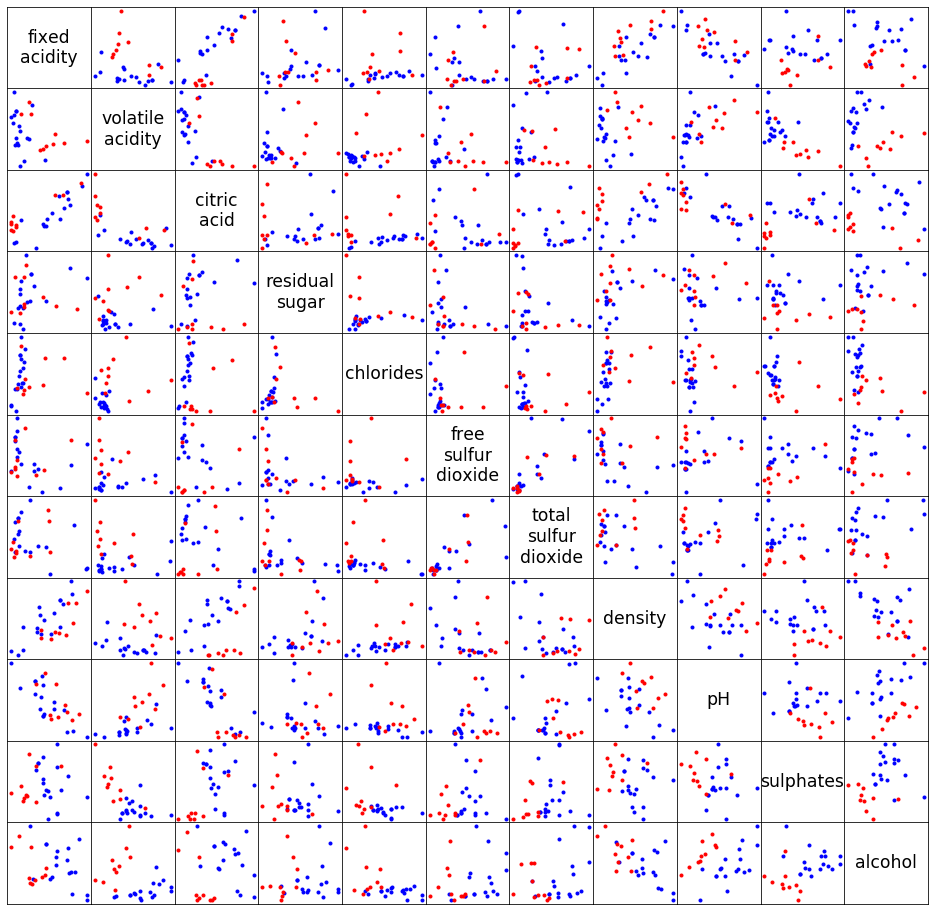

In [0]:
import matplotlib.pyplot as plt
import numpy as np
import pandas

def plot_scatter_matrix(wine_data, good_threshold, bad_threshold, save_plot=False):
    wine_good = wine_data[wine_data.quality >= good_threshold]
    wine_bad = wine_data[wine_data.quality <= bad_threshold]
    dimens = tuple([x for x in wine_data][:-1])
    style_good, style_bad = ('b.', 'r.')
    txt_args = {'size': 'xx-large',
                'horizontalalignment': 'center',
                'verticalalignment': 'center'}
    fig = plt.figure(num=1)
    fig.subplots_adjust(wspace=0, hspace=0)
    fig.set_size_inches(1.5*len(dimens), 1.5*len(dimens))
    ax = fig.subplots(len(dimens), len(dimens))#, sharex='all', sharey='all')
    for row in range(0, len(dimens)):
        for col in range(0,len(dimens)):
            ax[row,col].get_xaxis().set_visible(False)
            ax[row,col].get_yaxis().set_visible(False)
            if row == col:
                ax[row,col].text(0.5, 0.5, dimens[row].replace(' ', '\n'), txt_args)
            else:
                ax[row,col].plot(dimens[row], dimens[col], style_good, data=wine_good)
                ax[row,col].plot(dimens[row], dimens[col], style_bad, data=wine_bad)
    if save_plot is True:
        fig.savefig('wine_plot.png', dpi=100)


url = 'https://raw.githubusercontent.com/DamianDominoDavis/sommalier/master/winequality-red.csv'
csv = pandas.read_csv(url, sep=';')
plot_scatter_matrix(csv, 8, 3)


**b)** Now that you’ve had a chance to analyze different chemical factors in red wines and
their relationship with high scores (8 or higher) and low scores (3 or lower), which
factors do you think will be most useful to your perceptron for distinguishing high
quality vs. low quality wines? Why?

---
Correlation doesn't matter directly so much as distinctly different mappings for good vs bad wine properties on any two given axes; visually, that good and bad need not be in a pattern, or even all together, but that a clear "good side" and "bad side" exist, without any overlap at all. Which, if any, of these axes will be separable depends as much on the threshold selections as the input data.

#V.2 Learning to perceptron

**a)** Implement a perceptron that:
- Has randomly initialized weights and bias
- Uses the Rosenblatt perceptron learning rule (with changeable learning rate)
- Utilizes the heaviside step activation function (discrete version)

**b)** You’ll need to implement a function to train your perceptron. Your training function
should take in your red wine data as a parameter and should:
- Have a way to specify number of training epochs
- Train your perceptron until it makes no errors, if training epochs is set to 0,
- Have a way to specify learning rate.
- Return a list of python tuples containing (performance):

`[(current_epoch, num_errors_at_epoch_end, [array_of_weights], bias), . . . ]`

success in 999 epochs!


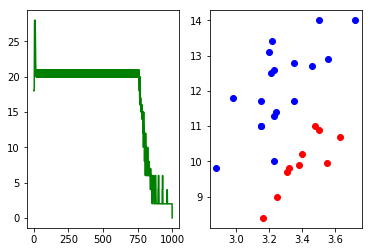

In [69]:
import random
import matplotlib.pyplot as plt
import numpy as np
import pandas

class Perceptron:
    def __init__(self, dataset):
        self.data = dataset
        self.dimens = tuple(x for x in self.data if x != 'quality')
        self.D = len(self.dimens)

    def train(self, threshold, rate, epoch=0):
        # rand init bias, weights
        bias = random.uniform(-1,1)
        weights = [random.uniform(-1,1)] * self.D

        # normalize data by column, transform quality to expected
        norm = self.data.div(self.data.sum(axis=1), axis=0)
        norm['expected'] = self.data['quality'] >= threshold
        
        ret = []
        cur_epoch = 0
        while cur_epoch < epoch or epoch == 0:
            num_errors = 0
            for i in range(norm.shape[0]):
                # compare bias to sum of weighted column values
                xi = norm.iloc[i]
                cmp = bias + sum([weights[d] * xi[self.dimens[d]] for d in range(self.D)])
                yi = int(cmp > 0)
        
                # rated adjustment towards expected values
                error = int(xi.expected) - yi
                if error:
                    num_errors += 1
                    weights = [weights[w] + error * rate * xi[self.dimens[w]] for w in range(self.D)]
                    bias += error * rate
            ret.append(tuple([cur_epoch, num_errors, weights, bias]))
            cur_epoch += 1
            # bail if ever trained to no errors
            if num_errors == 0:
                break
        return ret


url = 'https://raw.githubusercontent.com/DamianDominoDavis/sommalier/master/winequality-red.csv'
csv = pandas.read_csv(url, sep=';')
training = csv[['alcohol', 'pH', 'quality']]
training = training[(training.quality >= 8) | (training.quality <= 3)]

per = Perceptron(training)
ret = per.train(8, .001)
story = pandas.DataFrame(ret, columns=['epoch', 'errors', 'weights', 'bias'])

tgood = training[training['quality'] >= 8]
tbad = training[training['quality'] <= 3]
f, (ax, bx) = plt.subplots(1,2)
ax.plot(story['epoch'], story['errors'], 'g-')
bx.plot(tgood['pH'], tgood['alcohol'], 'bo')
bx.plot(tbad['pH'], tbad['alcohol'], 'ro')
print('success in {} epochs!'.format(ret[-1][0]) if ret[-1][1] == 0 else 'failure')